In [1]:
import os
import cv2
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
path = r"C:\Users\To Learn\Desktop\Exp3\DataSet RCNN\DataSet RCNN\Images\Images"
annot = r"C:\Users\To Learn\Desktop\Exp3\DataSet RCNN\DataSet RCNN\Airplanes_Annotations\Airplanes_Annotations"

airplane_001.jpg


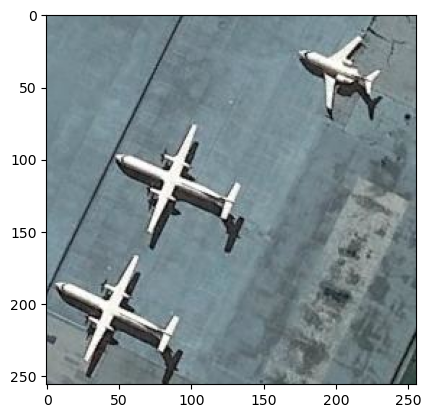

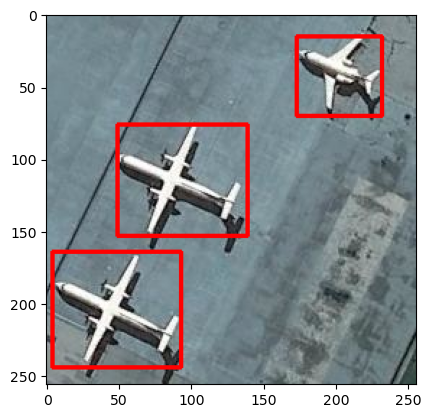

In [3]:
for e, i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0] + ".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path, filename))
        df = pd.read_csv(os.path.join(annot, i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img, (x1, y1), (x2, y2),(255, 0, 0),2)
        plt.figure()
        plt.imshow(img)
        break

In [4]:
from cv2.ximgproc import segmentation
print(dir(cv2.ximgproc.segmentation))

['GraphSegmentation', 'SelectiveSearchSegmentation', 'SelectiveSearchSegmentationStrategy', 'SelectiveSearchSegmentationStrategyColor', 'SelectiveSearchSegmentationStrategyFill', 'SelectiveSearchSegmentationStrategyMultiple', 'SelectiveSearchSegmentationStrategySize', 'SelectiveSearchSegmentationStrategyTexture', '__doc__', '__loader__', '__name__', '__package__', '__spec__', 'createGraphSegmentation', 'createSelectiveSearchSegmentation', 'createSelectiveSearchSegmentationStrategyColor', 'createSelectiveSearchSegmentationStrategyFill', 'createSelectiveSearchSegmentationStrategyMultiple', 'createSelectiveSearchSegmentationStrategySize', 'createSelectiveSearchSegmentationStrategyTexture']


In [5]:
from cv2.ximgproc.segmentation import createSelectiveSearchSegmentation
cv2.setUseOptimized(True);
ss = createSelectiveSearchSegmentation()

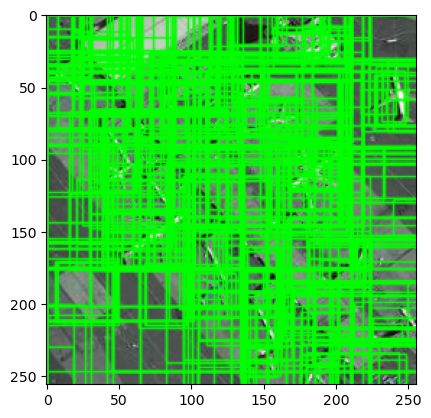

In [6]:
im = cv2.imread(os.path.join(path, "airplane_687.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x,y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)

In [7]:
train_images = []
train_labels = []

In [8]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [9]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [10]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 200 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (56,56), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (56,56), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_001.jpg
1 airplane_002.jpg
2 airplane_003.jpg
3 airplane_004.jpg
4 airplane_005.jpg
5 airplane_006.jpg
6 airplane_007.jpg
7 airplane_008.jpg
8 airplane_009.jpg
9 airplane_010.jpg
10 airplane_011.jpg
11 airplane_012.jpg
12 airplane_013.jpg
13 airplane_014.jpg
14 airplane_015.jpg
15 airplane_016.jpg
16 airplane_017.jpg
17 airplane_018.jpg
18 airplane_019.jpg
19 airplane_020.jpg
20 airplane_021.jpg
21 airplane_022.jpg
22 airplane_023.jpg
23 airplane_024.jpg
24 airplane_025.jpg
25 airplane_026.jpg
26 airplane_027.jpg
27 airplane_028.jpg
28 airplane_029.jpg
29 airplane_030.jpg
30 airplane_031.jpg
31 airplane_032.jpg
32 airplane_033.jpg
33 airplane_034.jpg
34 airplane_035.jpg
35 airplane_036.jpg
36 airplane_037.jpg
37 airplane_038.jpg
38 airplane_039.jpg
39 airplane_040.jpg
40 airplane_041.jpg
41 airplane_042.jpg
42 airplane_043.jpg
43 airplane_044.jpg
44 airplane_045.jpg
45 airplane_046.jpg
46 airplane_047.jpg
47 airplane_048.jpg
48 airplane_049.jpg
49 airplane_050.jpg
50 airplan

395 airplane_696.jpg
396 airplane_697.jpg
397 airplane_698.jpg
398 airplane_699.jpg
399 airplane_700.jpg


In [11]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [12]:
X_new.shape

(14429, 56, 56, 3)

In [13]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [14]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
])

In [17]:
X= model.layers[-2].output

In [18]:
predictions = Dense(2, activation="softmax")(X)

In [19]:
model_final = Model(inputs = model.input, outputs = predictions)

In [20]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [21]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [22]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 56, 56, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [24]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [25]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [26]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [27]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(12986, 56, 56, 3) (1443, 56, 56, 3) (12986, 2) (1443, 2)


In [28]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [30]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [31]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

Epoch 1/1000


C:\Users\To Learn\AppData\Local\Temp\ipykernel_4144\3734971591.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])


 9/10 [==========================>...] - ETA: 0s - loss: 9.6041 - accuracy: 0.6424 
Epoch 1: val_loss improved from inf to 1.16679, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 2s 69ms/step - loss: 8.7142 - accuracy: 0.6531 - val_loss: 1.1668 - val_accuracy: 0.7812
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 2.1887 - accuracy: 0.6250

C:\Users\To Learn\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 9/10 [==========================>...] - ETA: 0s - loss: 1.0320 - accuracy: 0.6528
Epoch 2: val_loss improved from 1.16679 to 0.71000, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 1s 56ms/step - loss: 0.9937 - accuracy: 0.6719 - val_loss: 0.7100 - val_accuracy: 0.8281
Epoch 3/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.5652 - accuracy: 0.7986
Epoch 3: val_loss improved from 0.71000 to 0.54117, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 1s 54ms/step - loss: 0.5677 - accuracy: 0.7906 - val_loss: 0.5412 - val_accuracy: 0.7656
Epoch 4/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.4276 - accuracy: 0.8542
Epoch 4: val_loss improved from 0.54117 to 0.42945, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 0s 48ms/step - loss: 0.4330 - accuracy: 0.8469 - val_loss: 0.4295 - val_accuracy: 0.8281
Epoch 5/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0

Epoch 31/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2527 - accuracy: 0.8958
Epoch 31: val_loss did not improve from 0.26388
10/10 [==============================] - 0s 44ms/step - loss: 0.2552 - accuracy: 0.8906 - val_loss: 0.3305 - val_accuracy: 0.8594
Epoch 32/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2796 - accuracy: 0.8785
Epoch 32: val_loss improved from 0.26388 to 0.22300, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 0s 47ms/step - loss: 0.3096 - accuracy: 0.8719 - val_loss: 0.2230 - val_accuracy: 0.8906
Epoch 33/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.3139 - accuracy: 0.8576
Epoch 33: val_loss did not improve from 0.22300
10/10 [==============================] - 0s 44ms/step - loss: 0.3081 - accuracy: 0.8594 - val_loss: 0.3440 - val_accuracy: 0.8438
Epoch 34/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2633 - accuracy: 0.8854
Epoch 34: val_loss did not improve fr

 9/10 [==========================>...] - ETA: 0s - loss: 0.2686 - accuracy: 0.8924
Epoch 60: val_loss did not improve from 0.13088
10/10 [==============================] - 0s 44ms/step - loss: 0.2639 - accuracy: 0.8969 - val_loss: 0.1733 - val_accuracy: 0.9062
Epoch 61/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.3083 - accuracy: 0.8924
Epoch 61: val_loss did not improve from 0.13088
10/10 [==============================] - 0s 44ms/step - loss: 0.2979 - accuracy: 0.8969 - val_loss: 0.2602 - val_accuracy: 0.9062
Epoch 62/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2764 - accuracy: 0.8889
Epoch 62: val_loss did not improve from 0.13088
10/10 [==============================] - 0s 44ms/step - loss: 0.3124 - accuracy: 0.8719 - val_loss: 0.4165 - val_accuracy: 0.8281
Epoch 63/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2797 - accuracy: 0.8715
Epoch 63: val_loss did not improve from 0.13088
10/10 [==============================] - 0s 

Epoch 90/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.3347 - accuracy: 0.8611
Epoch 90: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 45ms/step - loss: 0.3354 - accuracy: 0.8625 - val_loss: 0.4081 - val_accuracy: 0.8906
Epoch 91/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.3589 - accuracy: 0.8750
Epoch 91: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 45ms/step - loss: 0.3418 - accuracy: 0.8781 - val_loss: 0.3107 - val_accuracy: 0.8750
Epoch 92/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2381 - accuracy: 0.8924
Epoch 92: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 45ms/step - loss: 0.2490 - accuracy: 0.8875 - val_loss: 0.2399 - val_accuracy: 0.9062
Epoch 93/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2911 - accuracy: 0.8819
Epoch 93: val_loss did not improve from 0.10687
10/10 [=======================

Epoch 120/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2258 - accuracy: 0.9167
Epoch 120: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 44ms/step - loss: 0.2212 - accuracy: 0.9187 - val_loss: 0.3402 - val_accuracy: 0.9375
Epoch 121/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.1538 - accuracy: 0.9583
Epoch 121: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 43ms/step - loss: 0.1838 - accuracy: 0.9500 - val_loss: 0.4074 - val_accuracy: 0.8438
Epoch 122/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2536 - accuracy: 0.9306
Epoch 122: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 45ms/step - loss: 0.2427 - accuracy: 0.9281 - val_loss: 0.2071 - val_accuracy: 0.9375
Epoch 123/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.3020 - accuracy: 0.8819
Epoch 123: val_loss did not improve from 0.10687
10/10 [===============

Epoch 150/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2635 - accuracy: 0.8924
Epoch 150: val_loss did not improve from 0.10687
10/10 [==============================] - 1s 50ms/step - loss: 0.2519 - accuracy: 0.9000 - val_loss: 0.1695 - val_accuracy: 0.9531
Epoch 151/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.1632 - accuracy: 0.9271
Epoch 151: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 48ms/step - loss: 0.1648 - accuracy: 0.9219 - val_loss: 0.3196 - val_accuracy: 0.8594
Epoch 152/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.1726 - accuracy: 0.9479
Epoch 152: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 47ms/step - loss: 0.1689 - accuracy: 0.9469 - val_loss: 0.1854 - val_accuracy: 0.9062
Epoch 153/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2224 - accuracy: 0.9132
Epoch 153: val_loss did not improve from 0.10687
10/10 [===============

Epoch 180/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.1895 - accuracy: 0.9236
Epoch 180: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 45ms/step - loss: 0.1994 - accuracy: 0.9156 - val_loss: 0.3170 - val_accuracy: 0.9219
Epoch 181/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2347 - accuracy: 0.8993
Epoch 181: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 45ms/step - loss: 0.2352 - accuracy: 0.9062 - val_loss: 0.1998 - val_accuracy: 0.9219
Epoch 182/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.2199 - accuracy: 0.9201
Epoch 182: val_loss did not improve from 0.10687
10/10 [==============================] - 0s 45ms/step - loss: 0.2198 - accuracy: 0.9156 - val_loss: 0.1341 - val_accuracy: 0.9688
Epoch 183/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.1988 - accuracy: 0.9097
Epoch 183: val_loss did not improve from 0.10687
10/10 [===============

In [32]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


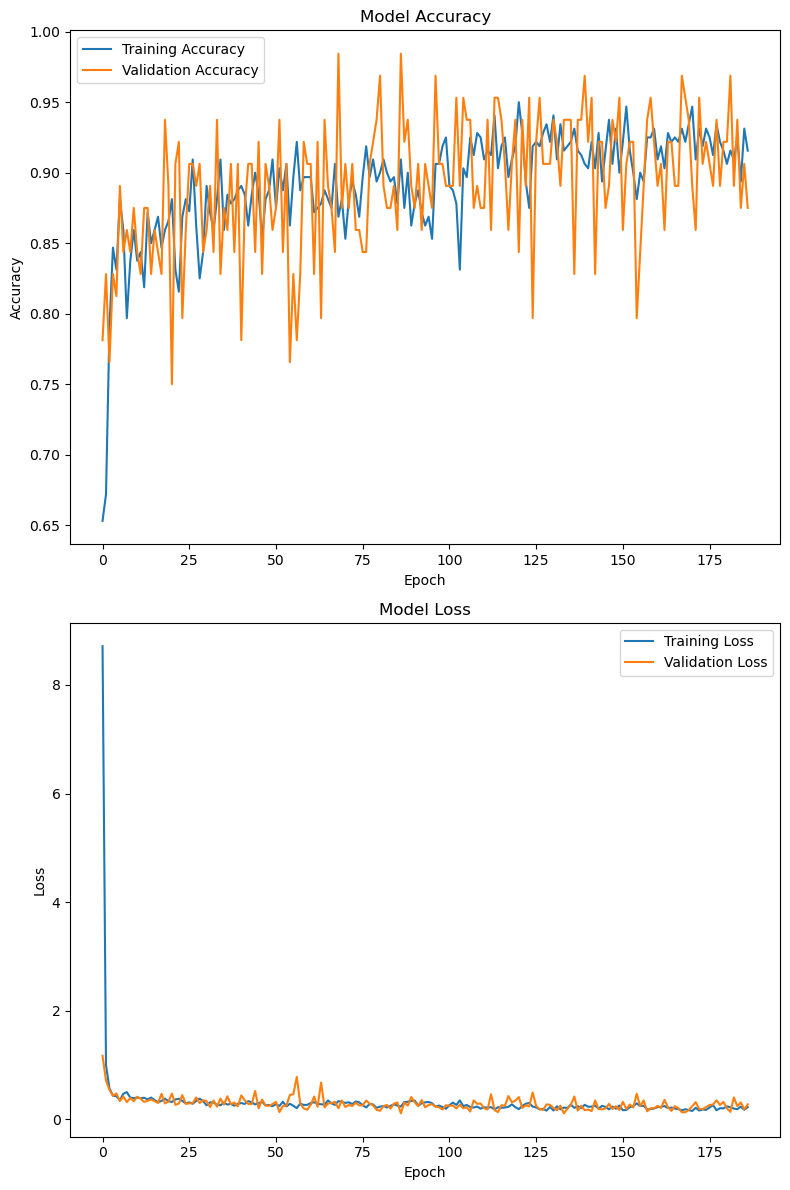

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
plt.plot(hist.history["accuracy"], label='Training Accuracy')
plt.plot(hist.history["val_accuracy"], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(hist.history["loss"], label='Training Loss')
plt.plot(hist.history["val_loss"], label='Validation Loss')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.tight_layout()
plt.show()

plt.savefig('chart_accuracy_and_loss_vertical.png')

Image shape: (56, 56, 3)


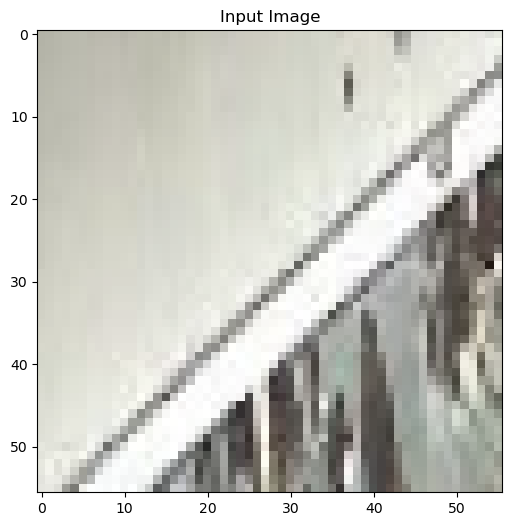

1/1 [==============================] - 0s 18ms/step
The image is not of a plane.


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Select the image to test
im = X_test[90]

# Check the image shape to understand its dimensions
print("Image shape:", im.shape)

# Display the image
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.imshow(im, aspect='auto')  # Set aspect ratio to 'auto' to fit image dimensions
plt.title("Input Image")
plt.axis('on')  # Show the axis to understand image dimensions
plt.show()

# Save the image to check the result externally
plt.imsave('displayed_image.png', im)

# Preprocess the image for model prediction
# Ensure the image is of the shape that the model expects
img = np.expand_dims(im, axis=0)  # Add batch dimension

# Predict using the model
out = model_final.predict(img)

# Check the prediction
# Assuming your model outputs probabilities for each class
if out[0][0] > out[0][1]:
    print("The image is of a plane.")
else:
    print("The image is not of a plane.")


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


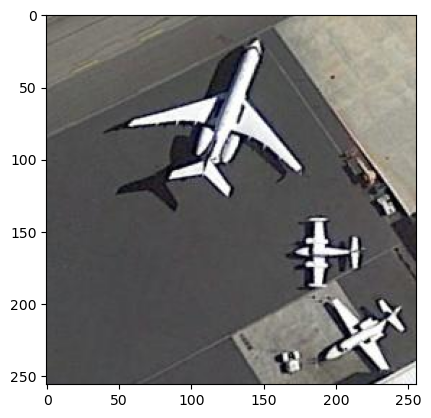

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Initialize Selective Search
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
# Ensure that your model is loaded correctly
# model = models.load_model('path_to_your_model') if you have saved it

z = 0  # Initialize a counter

for e, i in enumerate(os.listdir(path)):
    if i.startswith("airplane_007"):
        z += 1  # Increment the counter
        
        # Read the image
        img = cv2.imread(os.path.join(path, i))
        
        # Set the base image for selective search
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        
        # Get region proposals from selective search
        ssresults = ss.process()
        
        # Create a copy of the image for drawing bounding boxes
        imout = img.copy()
        
        for e, result in enumerate(ssresults):
            if e < 2000:  # Process up to 2000 proposals
                x, y, w, h = result  # Get the bounding box coordinates
                
                # Extract the region from the image
                timage = imout[y:y+h, x:x+w]
                
                # Resize the extracted region to the expected input size (56x56)
                resized = cv2.resize(timage, (56, 56), interpolation=cv2.INTER_AREA)
                
                # Normalize the image if required by your model
                resized = resized / 255.0
                
                # Prepare the region for prediction
                img = np.expand_dims(resized, axis=0)
                
                # Predict using the model
                out = model.predict(img)
                
                # Check if the model's prediction exceeds a threshold
                if out[0][0] > 0.65:
                    # Draw a bounding box around the region
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        
        # Display the processed image with bounding boxes
        plt.figure()
        plt.imshow(cv2.cvtColor(imout, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
        plt.show()
